In [2]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 17.9 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image
import numpy as np

In [4]:
reader = easyocr.Reader(['en', 'hi'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [14]:
file_name = "vasdvg (8).jpg"

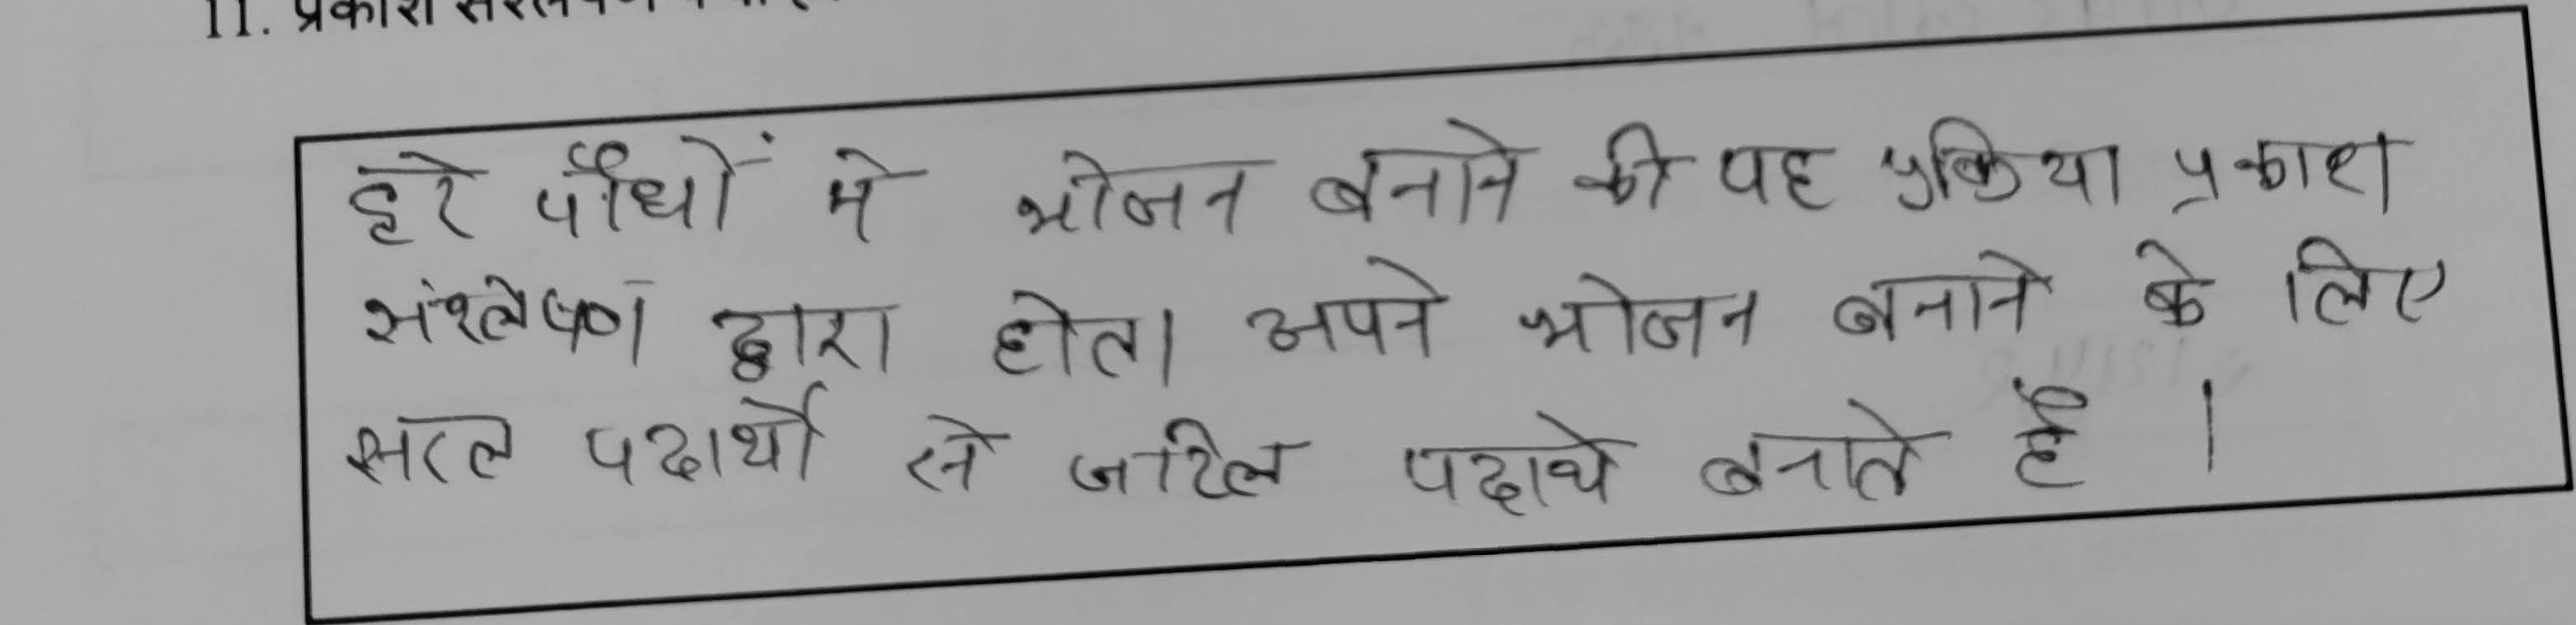

In [15]:
Image(file_name)

In [16]:
output = reader.readtext(file_name)

In [17]:
arr=[]
for i in output:
  arr.append(i[0])

(256, 423, 3)


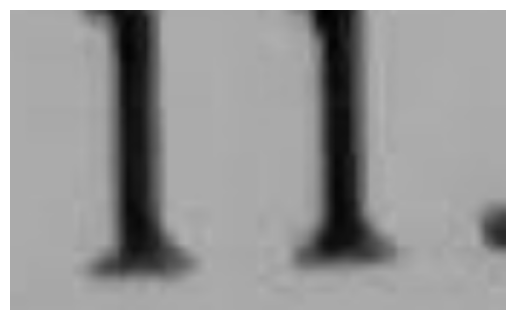

////////////////////////////////////////
(256, 1069, 3)


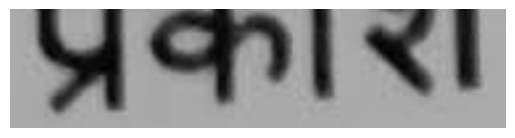

////////////////////////////////////////
(256, 1643, 3)


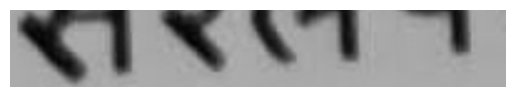

////////////////////////////////////////
(256, 512, 3)


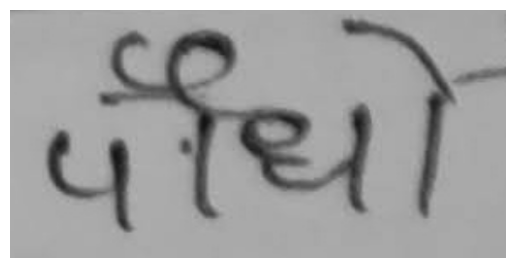

////////////////////////////////////////
(256, 284, 3)


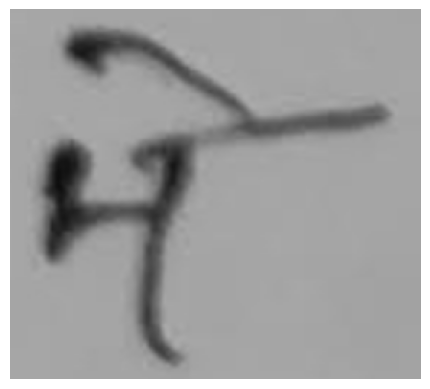

////////////////////////////////////////
(256, 2434, 3)


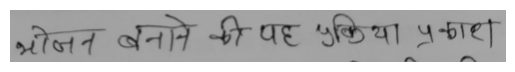

////////////////////////////////////////
(256, 686, 3)


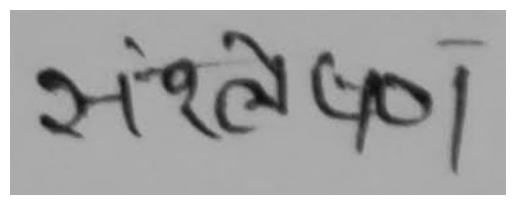

////////////////////////////////////////
(256, 526, 3)


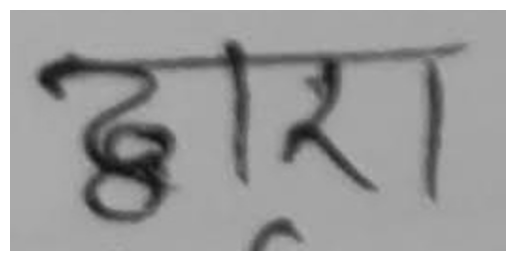

////////////////////////////////////////
(256, 532, 3)


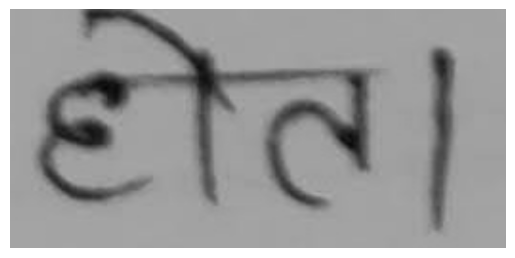

////////////////////////////////////////
(256, 567, 3)


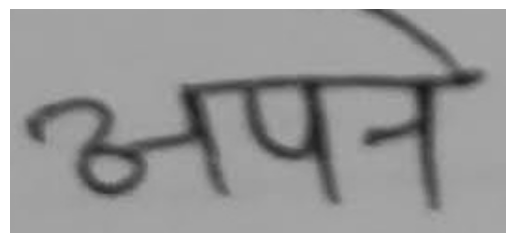

////////////////////////////////////////
(256, 704, 3)


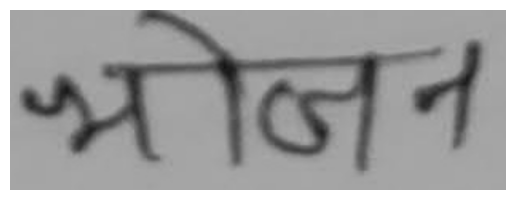

////////////////////////////////////////
(256, 533, 3)


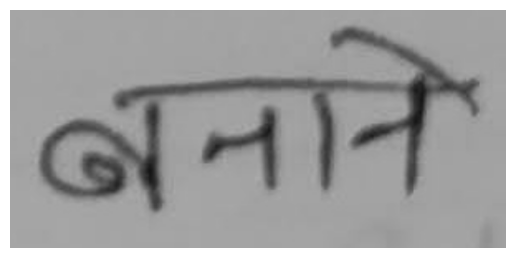

////////////////////////////////////////
(256, 224, 3)


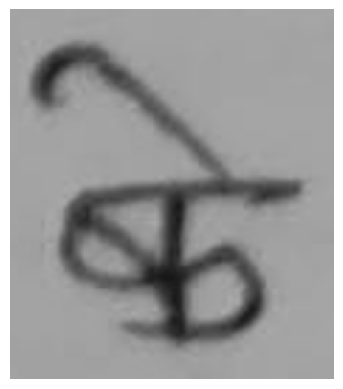

////////////////////////////////////////
(256, 449, 3)


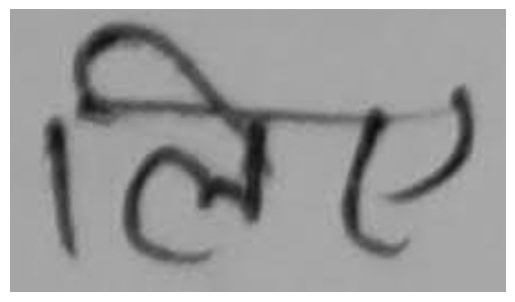

////////////////////////////////////////
(256, 566, 3)


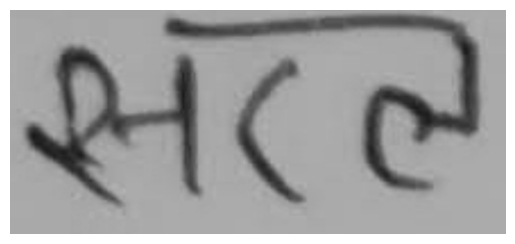

////////////////////////////////////////
(256, 630, 3)


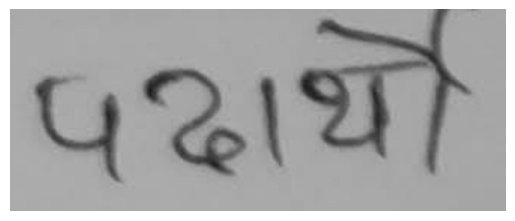

////////////////////////////////////////
(256, 859, 3)


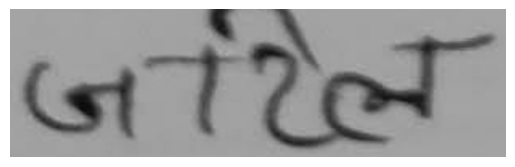

////////////////////////////////////////
(256, 513, 3)


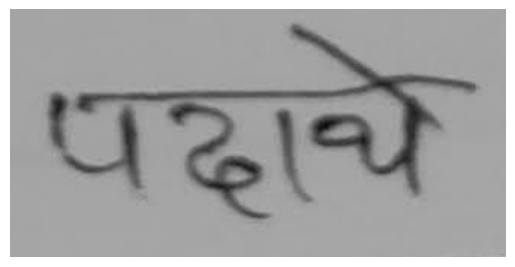

////////////////////////////////////////
(256, 937, 3)


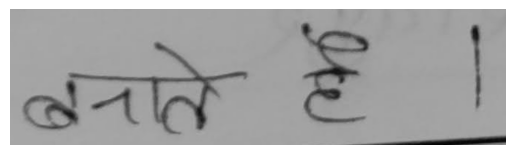

////////////////////////////////////////
(256, 355, 3)


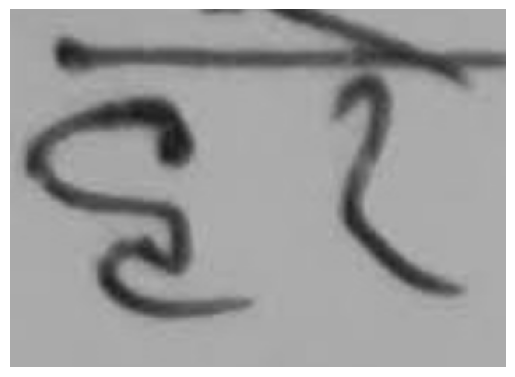

////////////////////////////////////////


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:709: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x, subok=True, copy=copy)


ValueError: ignored

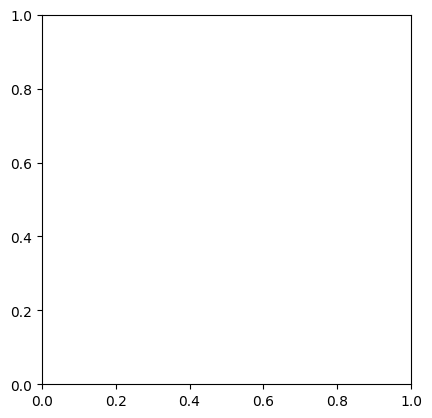

In [27]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'vasdvg (8).jpg'  # Replace with your image path
image = cv2.imread(image_path)

desired_height = 256

final_image=[]

bounding_boxes=arr
# Iterate over each bounding box
for i, box in enumerate(bounding_boxes):
    # Convert floating point coordinates to integers
    box = [[int(coord[0]), int(coord[1])] for coord in box]

    # Extract the coordinates of the bounding box
    x_min = min(box[0][0], box[1][0], box[2][0], box[3][0])
    x_max = max(box[0][0], box[1][0], box[2][0], box[3][0])
    y_min = min(box[0][1], box[1][1], box[2][1], box[3][1])
    y_max = max(box[0][1], box[1][1], box[2][1], box[3][1])

    # Crop the image based on the bounding box coordinates
    cropped_image = image[y_min:y_max, x_min:x_max]

    original_height, original_width = cropped_image.shape[:2]
    aspect_ratio = original_width / original_height
    new_width = int(desired_height * aspect_ratio)
    cropped_image = cv2.resize(cropped_image, (new_width, desired_height))
    final_image.append(cropped_image)


    # Display the cropped image
    plt.figure()
    print(cropped_image.shape)
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print("//"*20)

plt.figure()
plt.imshow(final_image)
plt.axis('off')
plt.show()



In [28]:
original_image = cv2.imread('vasdvg (8).jpg')

# List of bounding boxes
bounding_boxes = arr

# Create an empty list to store cropped and resized images
cropped_images = []

# Iterate over the bounding boxes
for box in bounding_boxes:
    # Convert the coordinates to integer values
    box = np.int0(box)

    # Extract the coordinates of the bounding box
    x_min = min(box[:, 0])
    x_max = max(box[:, 0])
    y_min = min(box[:, 1])
    y_max = max(box[:, 1])

    # Crop the region of interest from the original image
    cropped_image = original_image[y_min:y_max, x_min:x_max]

    # Resize the cropped image to a fixed height while maintaining aspect ratio
    fixed_height = 1024  # Adjust this value as desired
    ratio = fixed_height / cropped_image.shape[0]
    new_width = int(cropped_image.shape[1] * ratio)
    resized_image = cv2.resize(cropped_image, (new_width, fixed_height))

    # Append the resized image to the list
    cropped_images.append(resized_image)

# Concatenate the cropped and resized images horizontally
concatenated_image = np.concatenate(cropped_images, axis=1)

# Display the concatenated image

plt.figure()

plt.imshow(concatenated_image)
print(concatenated_image.shape)
plt.axis('off')
plt.show()


(800, 45165, 3)


In [29]:
output_filename = 'output.jpg'
cv2.imwrite(output_filename, concatenated_image)

True